# IMDB movie reviews classification

In [2]:
# 預防錯誤： OMP: Error #15: Initializing libiomp5.dylib, but found libiomp5.dylib already initialized.
import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [3]:
# loading the imdb dataset

from keras.datasets import imdb

# train_data: nparray of lists , train_label: ndarray of int64
(train_data, train_labels), (test_data, test_labels) = imdb.load_data( num_words=10000)

Using TensorFlow backend.


In [4]:
# decode and print out the first review

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [5]:
# 書上說：我們不能直接把int list送進神經網路，而要藉由embedding層或使用1 hot encooding , P69
# 自行實作1 hot encoding: convert integer sequences into a binary matrix

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) 
    for i, sequence in enumerate(sequences):
        # Sets specific indices of results[i] to 1s
        results[i, sequence] = 1.
    return results

# x_train.shape = (25000, 10000), x_train is ndarray of ndarray
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [30]:
# 建立網路：二層，每層16個神經元，使用relu做為啟動函數，用二元交換熵做損失函數
# 可以嘗試改用三層或一層，每層用32、64個神經元，使tanh做為啟動函數，用mse做損失函數

from keras import models 
from keras import layers

model = models.Sequential() 
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,))) 
model.add(layers.Dense(16, activation='tanh')) 
model.add(layers.Dense(1, activation='sigmoid'))

In [31]:
# 從訓練集中再劃分一塊做為驗證集

x_val = x_train[:10000] 
partial_x_train = x_train[10000:]

y_val = y_train[:10000] 
partial_y_train = y_train[10000:]

In [32]:
# 訓練模型

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 8s 523us/step - loss: 0.4936 - acc: 0.7959 - val_loss: 0.3683 - val_acc: 0.8699
Epoch 2/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.2834 - acc: 0.9097 - val_loss: 0.2955 - val_acc: 0.8834
Epoch 3/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.2013 - acc: 0.9329 - val_loss: 0.2696 - val_acc: 0.8888
Epoch 4/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.1509 - acc: 0.9506 - val_loss: 0.2798 - val_acc: 0.8882
Epoch 5/20
15000/15000 [==============================] - 3s 169us/step - loss: 0.1161 - acc: 0.9612 - val_loss: 0.2969 - val_acc: 0.8837
Epoch 6/20
15000/15000 [==============================] - 2s 162us/step - loss: 0.0895 - acc: 0.9729 - val_loss: 0.3398 - val_acc: 0.8797
Epoch 7/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.0693 - acc: 0.9793 - val_loss: 0.3676 - 

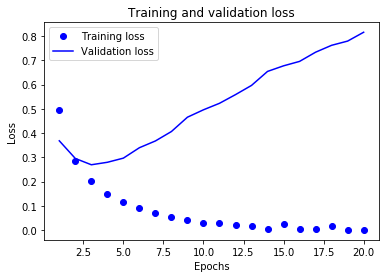

In [33]:
# plot the training and validation loss

import matplotlib.pyplot as plt

# history_dict has keys: 'acc', 'loss', 'val_acc', 'val_loss'
history_dict = history.history 
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)


# “bo” is for “blue dot.”
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
# “b” is f or “solid blue line.”
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')  
plt.legend()

plt.show()

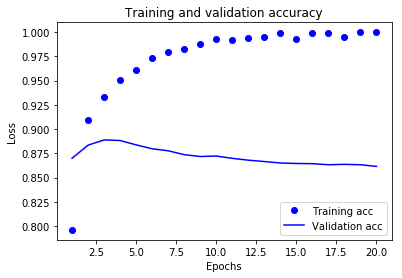

In [34]:
# plot training and validation accuracy
plt.clf()

acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc') 
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()

plt.show()

In [35]:
# use trained model to predict first 10 reviews in test dataset

y_hat_test = model.predict(x_test[0:10])
for y_hat in y_hat_test:
    print("%04.2f" % y_hat[0])


0.00
1.00
0.09
1.00
1.00
1.00
0.98
0.00
0.99
1.00
